In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'
file_rice = 'rice.png'
file_woman = 'woman.png'

In [3]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img, cmap='Greys_r');
        
def sharpen_img(image, blur):
    return image + (image - blur)

# Q.2 Edge Detection

## Q.2.1 Sobel edge detector

### Part 1

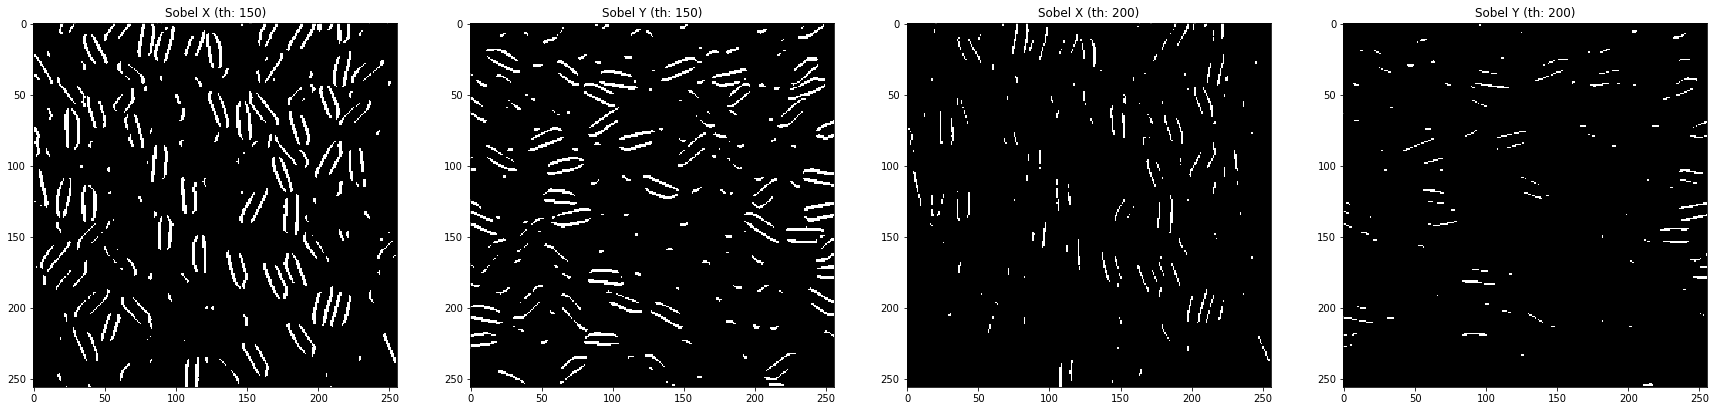

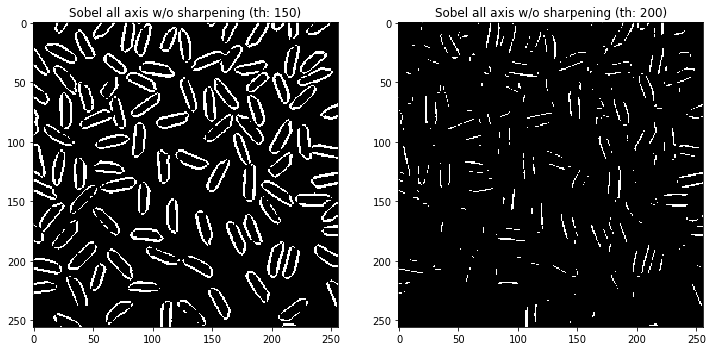

In [4]:
img_rice = cv2.imread(data_path + file_rice)

# Using cv2.CV_64F datatype 
sobel_x_rice = np.uint8(np.absolute(cv2.Sobel(img_rice, cv2.CV_64F, 1, 0, ksize=3)))
sobel_y_rice = np.uint8(np.absolute(cv2.Sobel(img_rice, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold
ret,thresh150_x = cv2.threshold(sobel_x_rice, 150, 255, cv2.THRESH_BINARY)
ret,thresh150_y = cv2.threshold(sobel_y_rice, 150, 255, cv2.THRESH_BINARY)
ret,thresh200_x = cv2.threshold(sobel_x_rice, 200, 255, cv2.THRESH_BINARY)
ret,thresh200_y = cv2.threshold(sobel_y_rice, 200, 255, cv2.THRESH_BINARY)
thresh150_all = thresh150_x + thresh150_y
thresh200_all = thresh200_x + thresh200_y

print_images([(thresh150_x, 'Sobel X (th: 150)'),
              (thresh150_y, 'Sobel Y (th: 150)'),
              (thresh200_x, 'Sobel X (th: 200)'),
              (thresh200_y, 'Sobel Y (th: 200)')], 30)
# Plot supperposed filters
print_images([(thresh150_all, 'Sobel all axis w/o sharpening (th: 150)'),
              (thresh200_all, 'Sobel all axis w/o sharpening (th: 200)')], 12)

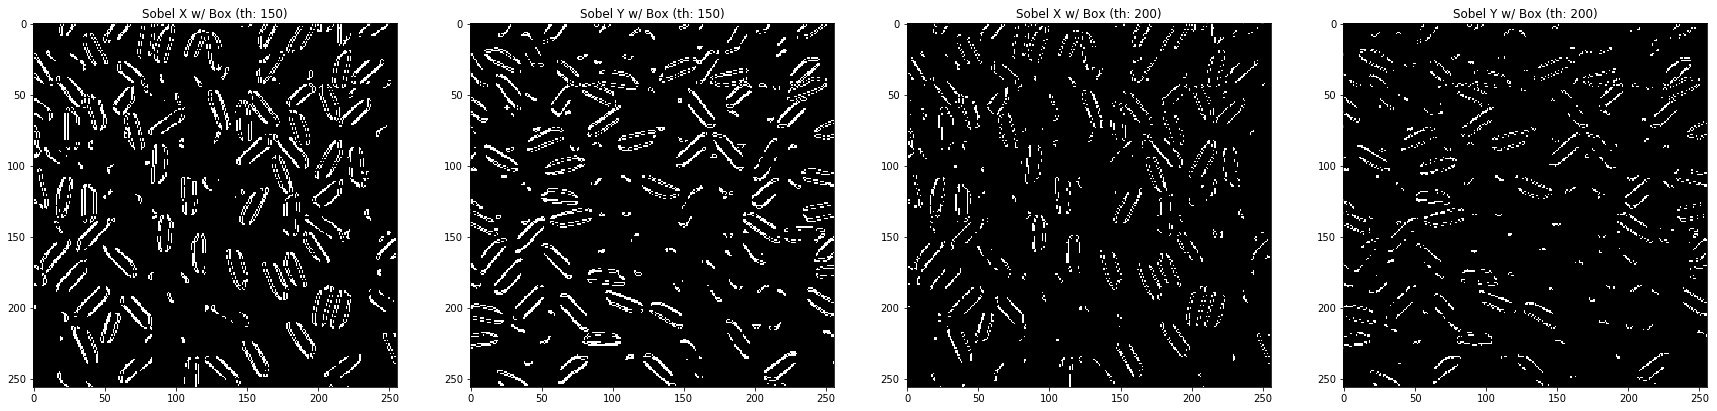

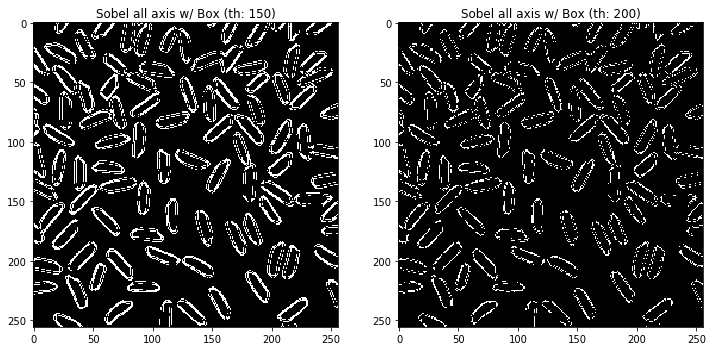

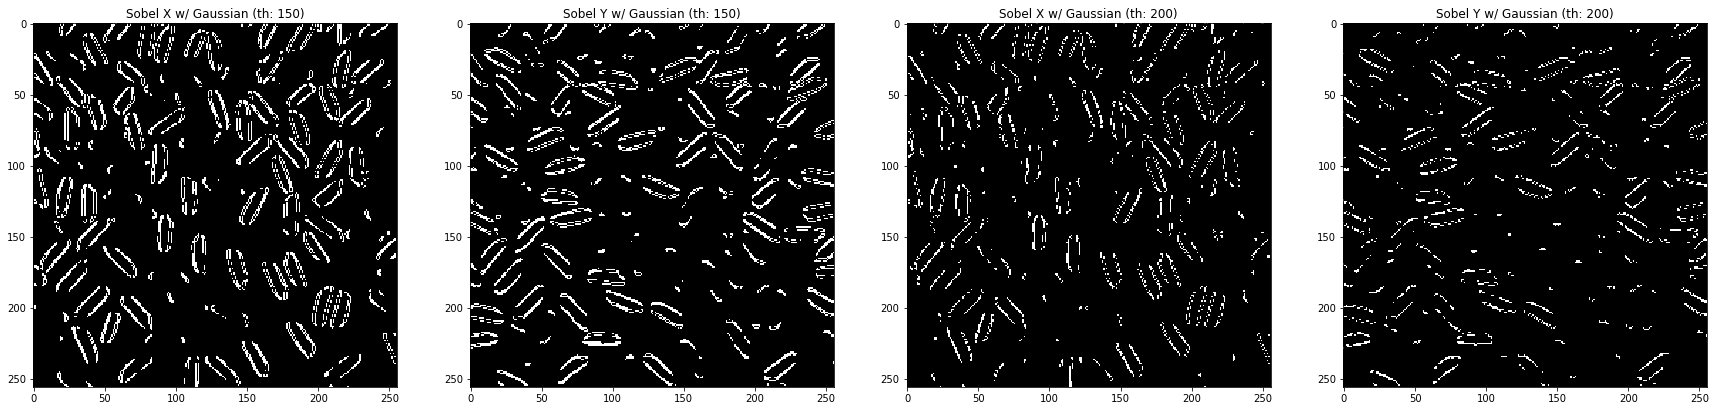

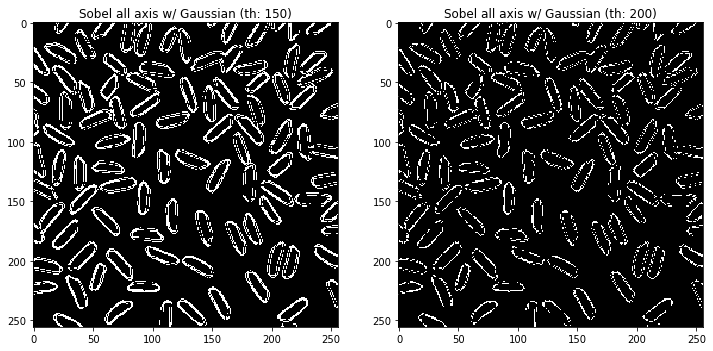

In [5]:
# Getting blurred images
img_rice_filter_box = cv2.blur(img_rice, (5,5))
img_rice_filter_gaussian = cv2.GaussianBlur(img_rice, ksize = (5,5), sigmaX = 2)

# Getting sharp images
img_rice_sharp_box = sharpen_img(img_rice, img_rice_filter_box)
img_rice_sharp_gaussian = sharpen_img(img_rice, img_rice_filter_gaussian)

# Apply Sobel filter
sobel_x_box = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_box, cv2.CV_64F, 1, 0, ksize=3)))
sobel_y_box = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_box, cv2.CV_64F, 0, 1, ksize=3)))
sobel_x_gaussian = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_gaussian, cv2.CV_64F, 1, 0, ksize=3)))
sobel_y_gaussian = np.uint8(np.absolute(cv2.Sobel(img_rice_sharp_gaussian, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold on box
ret,thresh150_x_box = cv2.threshold(sobel_x_box, 150, 255, cv2.THRESH_BINARY)
ret,thresh150_y_box = cv2.threshold(sobel_y_box, 150, 255, cv2.THRESH_BINARY)
ret,thresh200_x_box = cv2.threshold(sobel_x_box, 200, 255, cv2.THRESH_BINARY)
ret,thresh200_y_box = cv2.threshold(sobel_y_box, 200, 255, cv2.THRESH_BINARY)
thresh150_all_box = thresh150_x_box + thresh150_y_box
thresh200_all_box = thresh200_x_box + thresh200_y_box

# Plot Box
print_images([(thresh150_x_box, 'Sobel X w/ Box (th: 150)'),
              (thresh150_y_box, 'Sobel Y w/ Box (th: 150)'),
              (thresh200_x_box, 'Sobel X w/ Box (th: 200)'),
              (thresh200_y_box, 'Sobel Y w/ Box (th: 200)')], 30)
# Plot supperposed filters
print_images([(thresh150_all_box, 'Sobel all axis w/ Box (th: 150)'),
              (thresh200_all_box, 'Sobel all axis w/ Box (th: 200)')], 12)

# Apply threshold on Gaussian
ret,thresh150_x_Gaussian = cv2.threshold(sobel_x_gaussian, 150, 255, cv2.THRESH_BINARY)
ret,thresh150_y_Gaussian = cv2.threshold(sobel_y_gaussian, 150, 255, cv2.THRESH_BINARY)
ret,thresh200_x_Gaussian = cv2.threshold(sobel_x_gaussian, 200, 255, cv2.THRESH_BINARY)
ret,thresh200_y_Gaussian = cv2.threshold(sobel_y_gaussian, 200, 255, cv2.THRESH_BINARY)
thresh150_all_Gaussian = thresh150_x_Gaussian + thresh150_y_Gaussian
thresh200_all_Gaussian = thresh200_x_Gaussian + thresh200_y_Gaussian

# Plot Gaussian
print_images([(thresh150_x_Gaussian, 'Sobel X w/ Gaussian (th: 150)'),
              (thresh150_y_Gaussian, 'Sobel Y w/ Gaussian (th: 150)'),
              (thresh200_x_Gaussian, 'Sobel X w/ Gaussian (th: 200)'),
              (thresh200_y_Gaussian, 'Sobel Y w/ Gaussian (th: 200)')], 30)

# Plot supperposed filters
print_images([(thresh150_all_Gaussian, 'Sobel all axis w/ Gaussian (th: 150)'),
              (thresh200_all_Gaussian, 'Sobel all axis w/ Gaussian (th: 200)')], 12)

1. Applying sharpening filters before applying the Sobel filters all the detection of the begening and the end all edges. For instance, we can observe that the rice grain has 2 layers.
2. The threshold of 150 works much better than 200 and we can observe a well defined contour with the images no matter the sharpening filter applied.

### Part 2

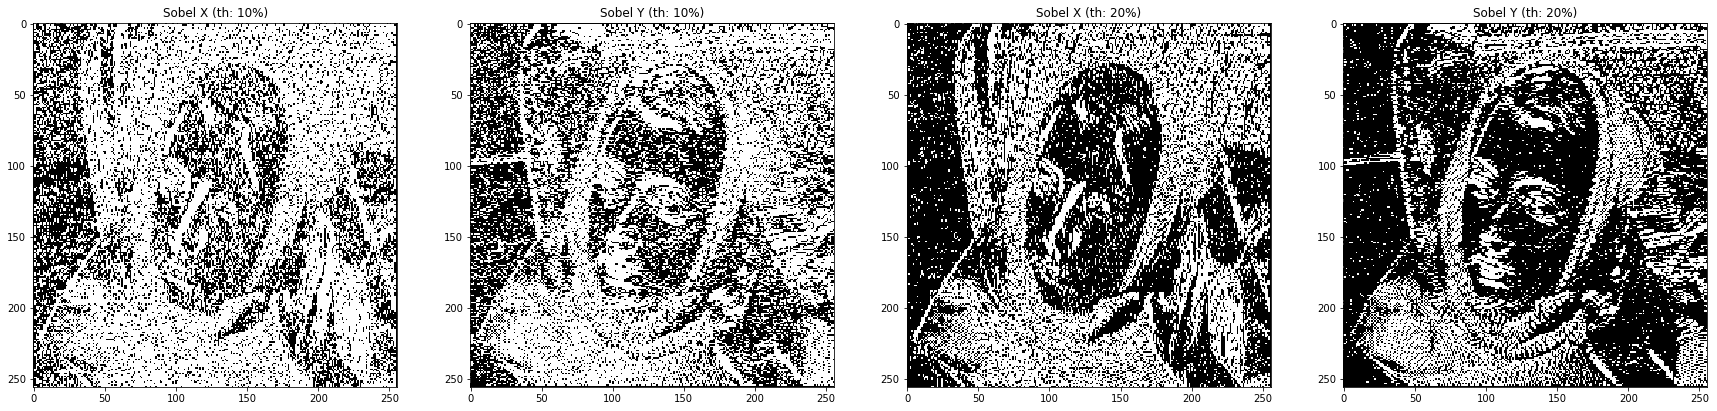

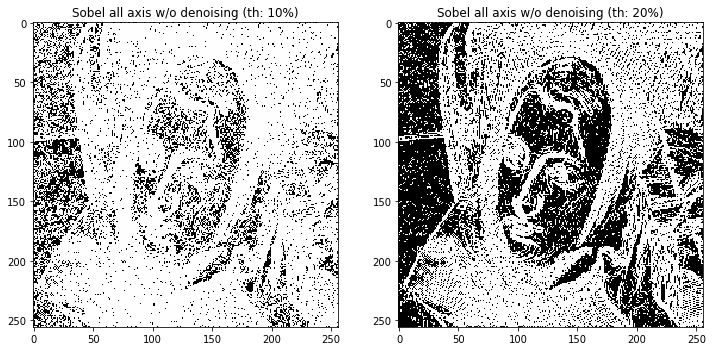

In [6]:
img_woman = cv2.imread(data_path + file_woman)
img_woman = cv2.cvtColor(img_woman, cv2.COLOR_BGR2GRAY)

# Using cv2.CV_64F datatype 
sobel_x_woman = np.uint8(np.absolute(cv2.Sobel(img_woman, cv2.CV_64F, 1, 0, ksize=3)))
sobel_y_woman = np.uint8(np.absolute(cv2.Sobel(img_woman, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold
max_val_x_woman = np.amax(sobel_x_woman)
max_val_y_woman = np.amax(sobel_y_woman)
ret,thresh10_x_woman = cv2.threshold(sobel_x_woman, int(max_val_x_woman*0.1),
                                     max_val_x_woman, cv2.THRESH_BINARY)
ret,thresh10_y_woman = cv2.threshold(sobel_y_woman, int(max_val_y_woman*0.1),
                                     max_val_y_woman, cv2.THRESH_BINARY)
ret,thresh20_x_woman = cv2.threshold(sobel_x_woman, int(max_val_x_woman*0.2),
                                     max_val_x_woman, cv2.THRESH_BINARY)
ret,thresh20_y_woman = cv2.threshold(sobel_y_woman, int(max_val_y_woman*0.2),
                                     max_val_y_woman, cv2.THRESH_BINARY)
thresh10_all_woman = thresh10_x_woman + thresh10_y_woman
thresh20_all_woman = thresh20_x_woman + thresh20_y_woman

print_images([(thresh10_x_woman, 'Sobel X (th: 10%)'),
              (thresh10_y_woman, 'Sobel Y (th: 10%)'),
              (thresh20_x_woman, 'Sobel X (th: 20%)'),
              (thresh20_y_woman, 'Sobel Y (th: 20%)')], 30)

# Plot supperposed filters
print_images([(thresh10_all_woman, 'Sobel all axis w/o denoising (th: 10%)'),
              (thresh20_all_woman, 'Sobel all axis w/o denoising (th: 20%)')], 12)

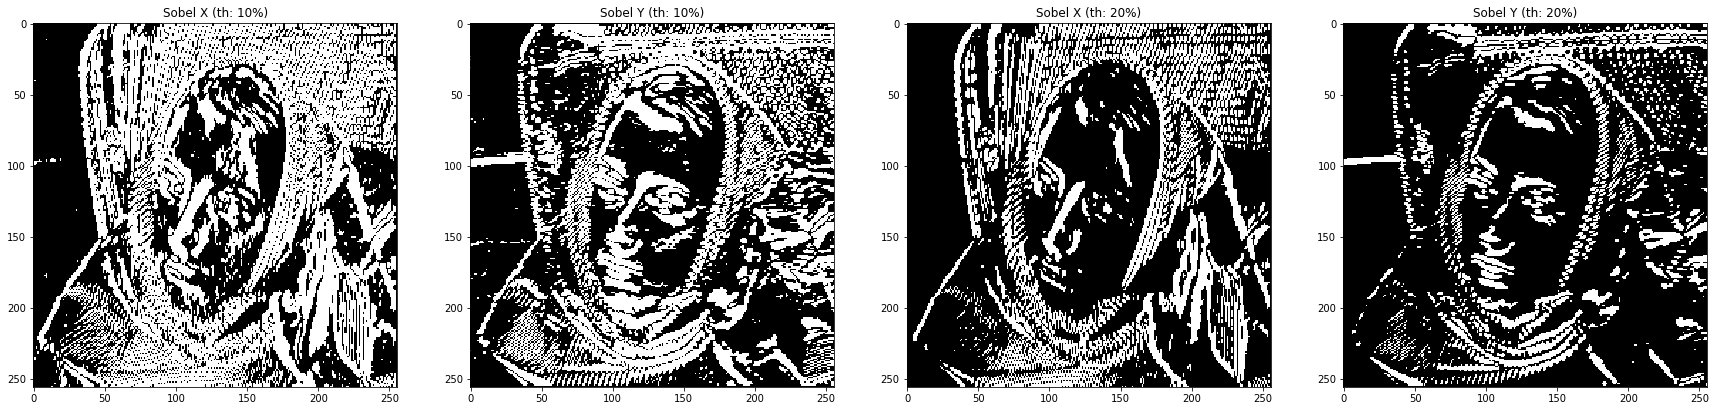

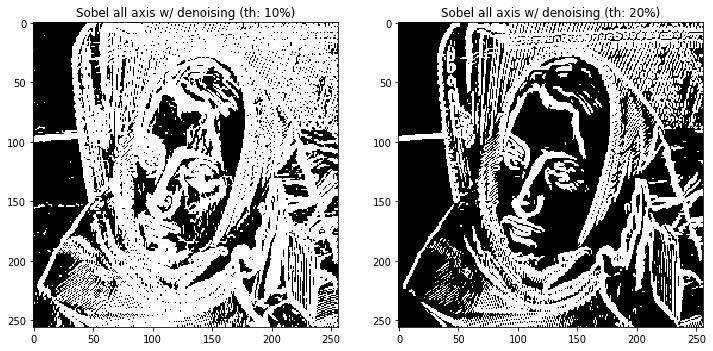

In [7]:
# Getting blurred images
img_woman_filter_box = cv2.blur(img_woman, (3,3))

# Using cv2.CV_64F datatype 
sobel_x_woman_box = np.uint8(np.absolute(cv2.Sobel(img_woman_filter_box, cv2.CV_64F, 1, 0, ksize=3)))
sobel_y_woman_box = np.uint8(np.absolute(cv2.Sobel(img_woman_filter_box, cv2.CV_64F, 0, 1, ksize=3)))

# Apply threshold
max_val_x_woman_box = np.amax(sobel_x_woman_box)
max_val_y_woman_box = np.amax(sobel_y_woman_box)
ret,thresh10_x_woman_box = cv2.threshold(sobel_x_woman_box, int(max_val_x_woman_box*0.1),
                                         max_val_x_woman_box, cv2.THRESH_BINARY)
ret,thresh10_y_woman_box = cv2.threshold(sobel_y_woman_box, int(max_val_y_woman_box*0.1),
                                         max_val_y_woman_box, cv2.THRESH_BINARY)
ret,thresh20_x_woman_box = cv2.threshold(sobel_x_woman_box, int(max_val_x_woman_box*0.2),
                                         max_val_x_woman_box, cv2.THRESH_BINARY)
ret,thresh20_y_woman_box = cv2.threshold(sobel_y_woman_box, int(max_val_y_woman_box*0.2),
                                         max_val_y_woman_box, cv2.THRESH_BINARY)
thresh10_all_woman_box = thresh10_x_woman_box + thresh10_y_woman_box
thresh20_all_woman_box = thresh20_x_woman_box + thresh20_y_woman_box

print_images([(thresh10_x_woman_box, 'Sobel X (th: 10%)'),
              (thresh10_y_woman_box, 'Sobel Y (th: 10%)'),
              (thresh20_x_woman_box, 'Sobel X (th: 20%)'),
              (thresh20_y_woman_box, 'Sobel Y (th: 20%)')], 30)

# Plot supperposed filters
print_images([(thresh10_all_woman_box, 'Sobel all axis w/ denoising (th: 10%)'),
              (thresh20_all_woman_box, 'Sobel all axis w/ denoising (th: 20%)')], 12)

Denoising the image before applying the sobel filter makes a huge difference and results in a much better edge detection. The threshold of 20% is better than 10%.

## Q.2.2 Laplacian of Gaussian

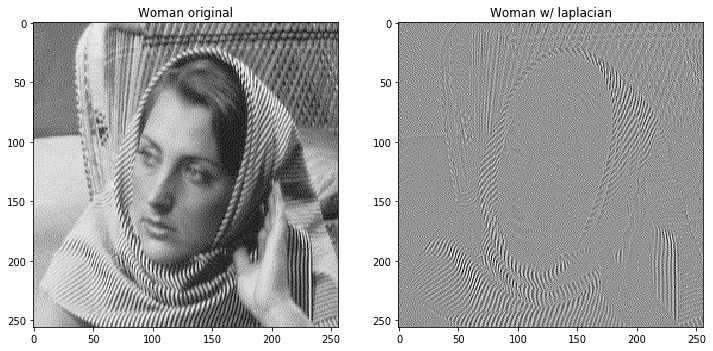

In [11]:
laplacian_woman = cv2.Laplacian(img_woman, cv2.CV_64F)

# Ploting images
print_images([(img_woman, 'Woman original'),
              (laplacian_woman, 'Woman w/ laplacian')], 12)